### This function crops images to be a certain aspect ratio, defined by pixels or aspect ratio, such that all images look uniform in shape in a gallery preview and as blog thumbnail.

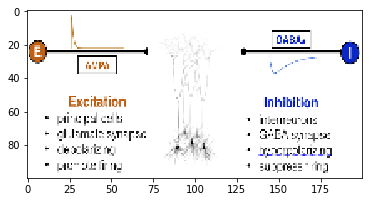

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
img_path = '/Users/rdgao/Documents/code/rdgao.github.io/assets/images/projects/nfp0.png'
img = cv2.imread(img_path)

res = cv2.resize(img, dsize=(200, 100), interpolation=cv2.INTER_CUBIC)
plt.imshow(res)
#img.shape

In [2]:
def return_resized_img(img, target_dim, resize_option, resize_unit='aspect', pad_color=255):
    target_dim = np.flip(target_dim,0)
    input_dim = np.array(img.shape[:2]).astype(int)
    center_pixel = (0.5*input_dim).astype(int)
    input_ratio = input_dim/input_dim[0]
    output_ratio = target_dim/target_dim[0] # compute aspect ratio based on width (width is always 1)

    if output_ratio[1]>input_ratio[1]:
        # normed output width greater than input width 
        if resize_option is 'pad':
            # --> hold height constant & increase width to match output ratio
            output_dim = np.ceil(np.array([input_dim[0],input_dim[0]*output_ratio[1]])).astype(int)
            start_pix = int((output_dim[1]-input_dim[1])/2)
            output_img = pad_color*np.ones((output_dim[0],output_dim[1],3))
            output_img[:,start_pix:start_pix+input_dim[1],:] = img
        elif resize_option is 'crop':
            # --> hold width constant & decrease height to match output ratio
            output_dim = np.ceil(np.array([input_dim[1]/output_ratio[1],input_dim[1]])).astype(int)
            start_pix = int((input_dim[0]-output_dim[0])/2)
            output_img = img[start_pix:start_pix+output_dim[0],:,:]
    else:
        # normed output width less than input width 
        if resize_option is 'pad':
            # --> hold width constant & increase height to match output ratio        
            output_dim = np.ceil(np.array([input_dim[1]/output_ratio[1],input_dim[1]])).astype(int)
            start_pix = int((output_dim[0]-input_dim[0])/2)
            output_img = pad_color*np.ones((output_dim[0],output_dim[1],3))
            output_img[start_pix:start_pix+input_dim[0],:,:] = img
        elif resize_option is 'crop':
            # --> hold height constant & decrease width to match output ratio        
            output_dim = np.ceil(np.array([input_dim[0],input_dim[0]*output_ratio[1]])).astype(int)
            start_pix = int((input_dim[1]-output_dim[1])/2)
            output_img = img[:,start_pix:start_pix+output_dim[1],:]
    
#     print(input_ratio, input_dim, target_dim, output_dim)
    # resize to desired absolute size if resize_unit is pixels
    if resize_unit is 'aspect':
        return output_img.astype('uint8')
    elif resize_unit is 'pixel':
        return cv2.resize(output_img, dsize=(target_dim[1],target_dim[0])).astype('uint8')

[1.         2.45980707] [311 765] [1.  1.5] [510 765]


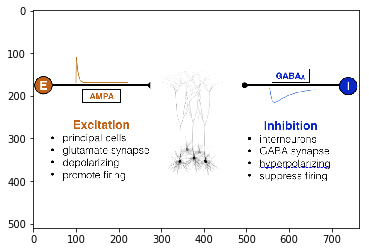

In [12]:
resize_option = 'pad' # 'pad' 'crop'
resize_unit = 'aspect'#, 'pixel' #aspect
target_dim = np.array([1.5,1]) # width, height
output_img = return_resized_img(img, target_dim, resize_option, resize_unit)
plt.imshow(output_img)